**UNEMPLOYMENT ANALYSIS WITH PYTHON**

**PROBLEM STATEMENT**:

Unemployment, a critical economic indicator, is typically quantified using the unemployment rate, which represents the proportion of individuals without employment within the total labor force. The COVID-19 pandemic has significantly impacted the global labor market, resulting in a substantial surge in the unemployment rate. Analyzing and comprehending the dynamics of this economic metric through data science can offer valuable insights and potential solutions.



**PROBLEM OBJECTIVE**:

The primary goal of this project is to perform a comprehensive analysis of unemployment using Python. This analysis aims to shed light on the factors contributing to changes in the unemployment rate, identify patterns, and generate actionable recommendations to address unemployment challenges

**PROJECT OUTCOME**

The outcome of unemployment analysis with Python involves gaining insights into the unemployment trends, patterns, and factors influencing unemployment rates using data analysis and visualization techniques.

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**LOADING DATASET**

In [ ]:
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
#Understanding the structure of the dataset
df.shape

(267, 9)

The unemployment dataset contains 267 instances and 9 variables.

**PREPROCESSING THE DATASET**

In [ ]:
#Checking for missing values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

Null values are absent.

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

No duplicate values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [ ]:
df[' Date'] = pd.to_datetime(df[' Date'])
print(df.dtypes)

Region                                              object
 Date                                       datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                  int64
 Estimated Labour Participation Rate (%)           float64
Region.1                                            object
longitude                                          float64
latitude                                           float64
dtype: object



Here the column 'Date' was in the object type datatype so we converted it into the datetime format.

In [ ]:
# selecting the categorical variables
categorical_var = df.select_dtypes(include='object')
# Obtaining summary statistics for the categorical variables
categorical_stat = categorical_var.describe().T
categorical_stat

,count,unique,top,freq
Region,267,27,Andhra Pradesh,10
Frequency,267,1,M,267
Region.1,267,5,North,79


In [ ]:
# selecting numerical variables
numerical_var = df.select_dtypes(exclude='object')
# Obtaining summar statistics for the numerical variables
numerical_stat = numerical_var.describe().T
numerical_stat

,count,mean,min,25%,50%,75%,max,std
Date,267,2020-06-16 09:15:30.337078528,2020-01-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-08-31 00:00:00,2020-10-31 00:00:00,NaN
Estimated Unemployment Rate (%),267.0,12.236929,0.5,4.845,9.65,16.755,75.85,10.803283
Estimated Employed,267.0,13962105.722846,117542.0,2838930.5,9732417.0,21878686.0,59433759.0,13366318.359733
Estimated Labour Participation Rate (%),267.0,41.681573,16.77,37.265,40.39,44.055,69.69,7.845419
longitude,267.0,22.826048,10.8505,18.1124,23.6102,27.2784,33.7782,6.270731
latitude,267.0,80.532425,71.1924,76.0856,79.0193,85.2799,92.9376,5.831738


The mean estimated unemployment rate is high. The high unemployment rate could be attributed to the economic disruptions caused by the pandemic, such as lockdowns, reduced economic activity, and job losses in various sectors.

In [ ]:
#Dropping irrelevent column
df = df.drop(' Frequency', axis=1)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.74


**VISUALISING THE DATASET**

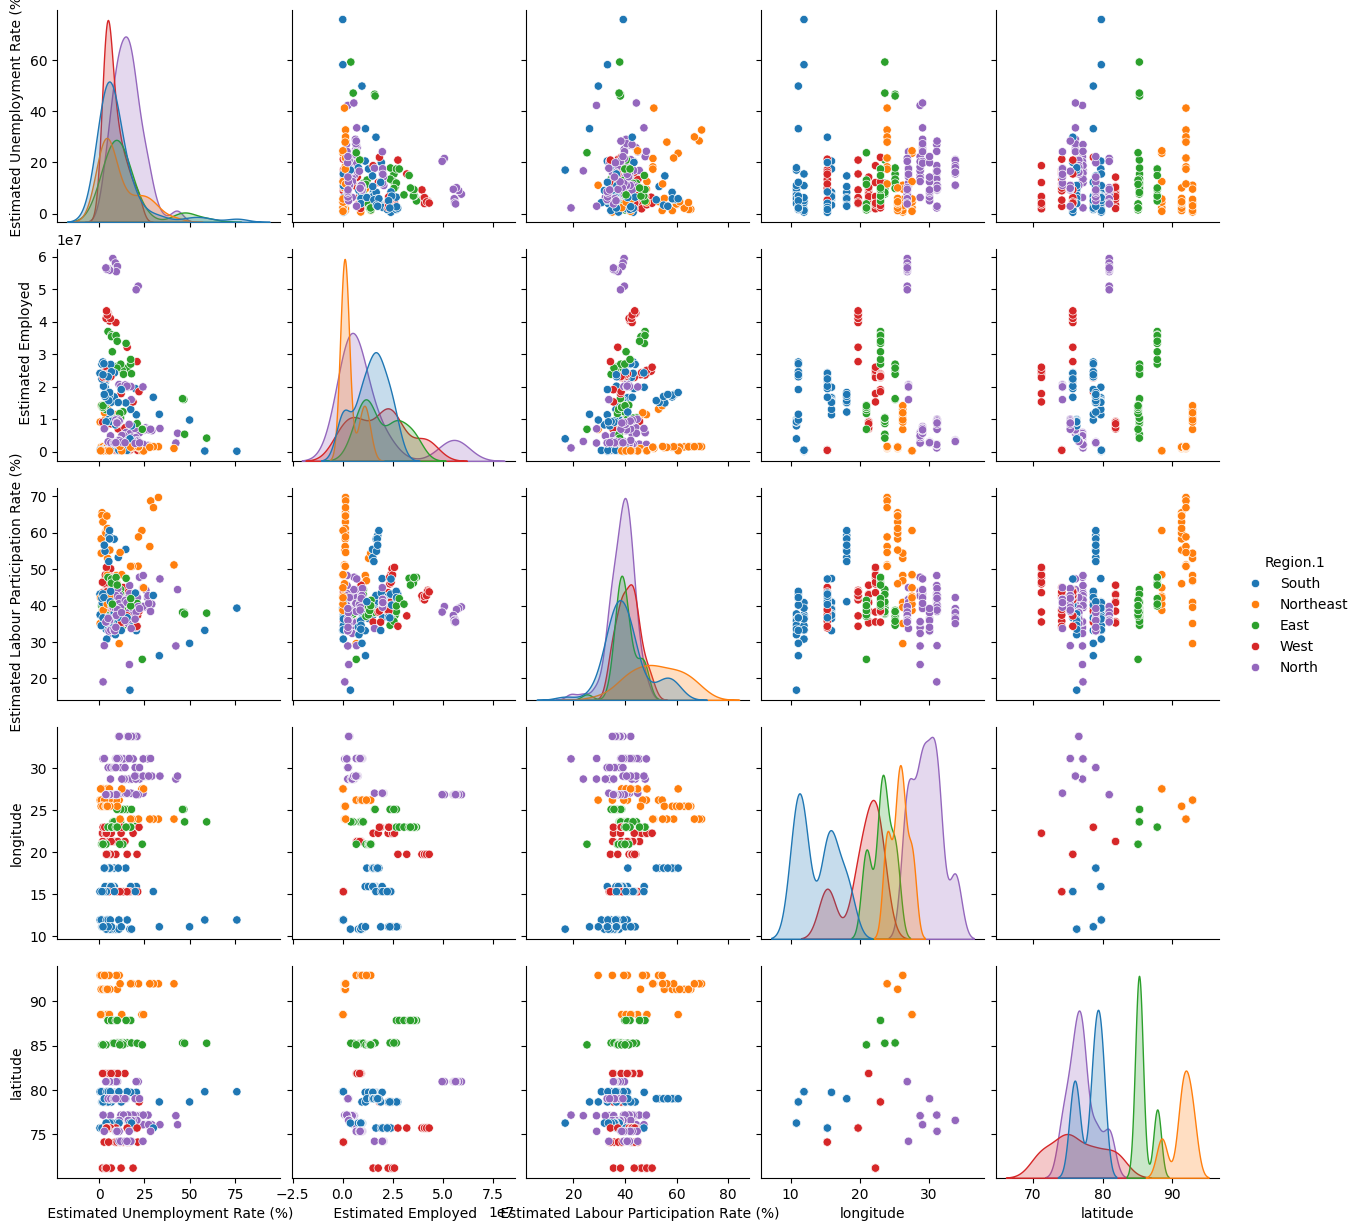

In [ ]:
sns.pairplot(df, hue='Region.1')

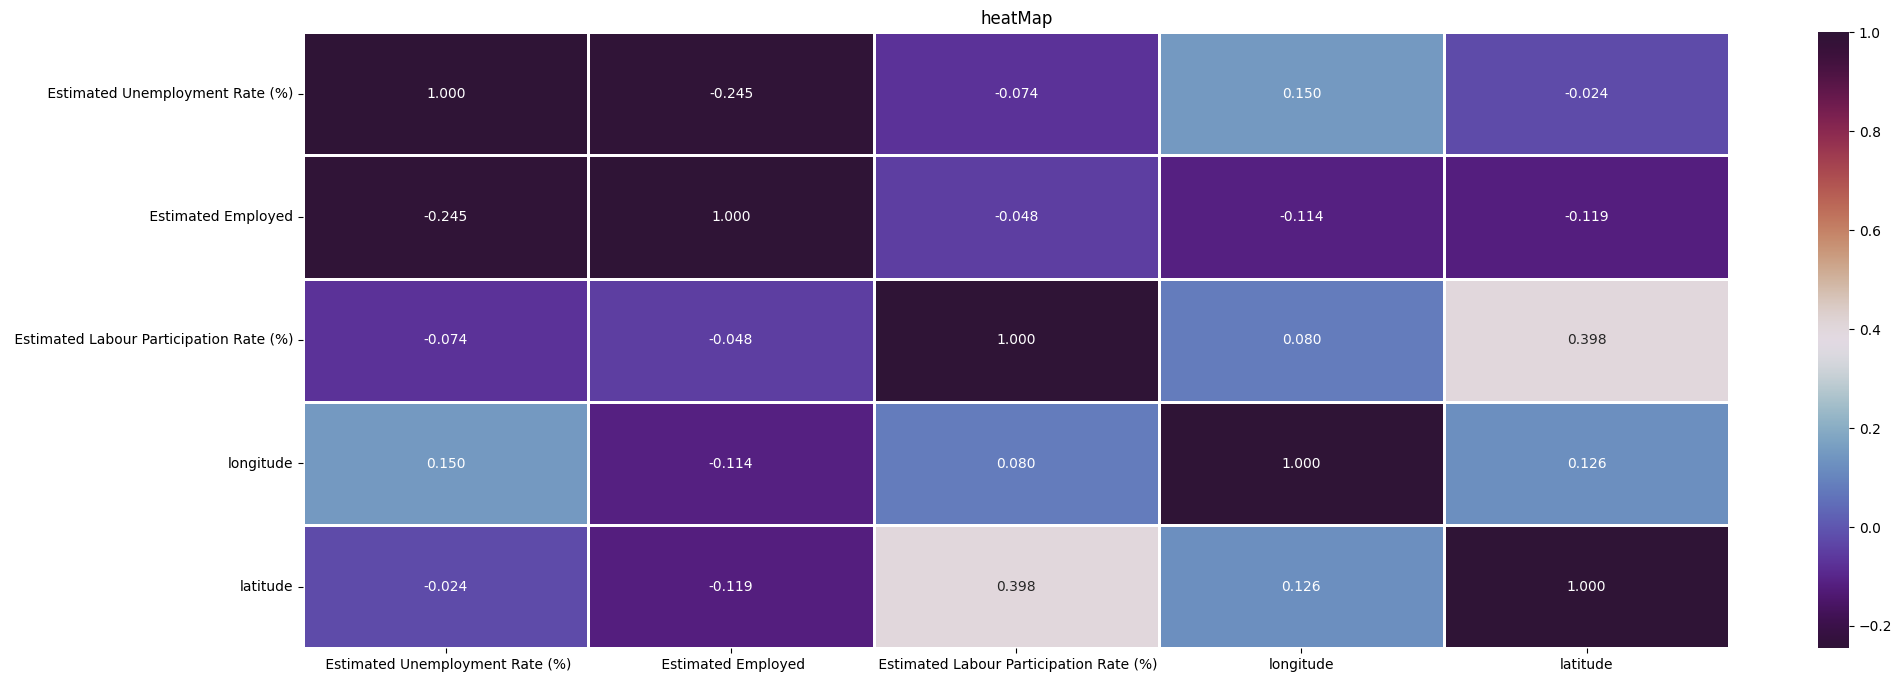

In [ ]:
heatMap = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed',
              ' Estimated Labour Participation Rate (%)', 'longitude', 'latitude']]

#constructing on heatMap with correlation values
heatMap = heatMap.corr()

#plotting the figure
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

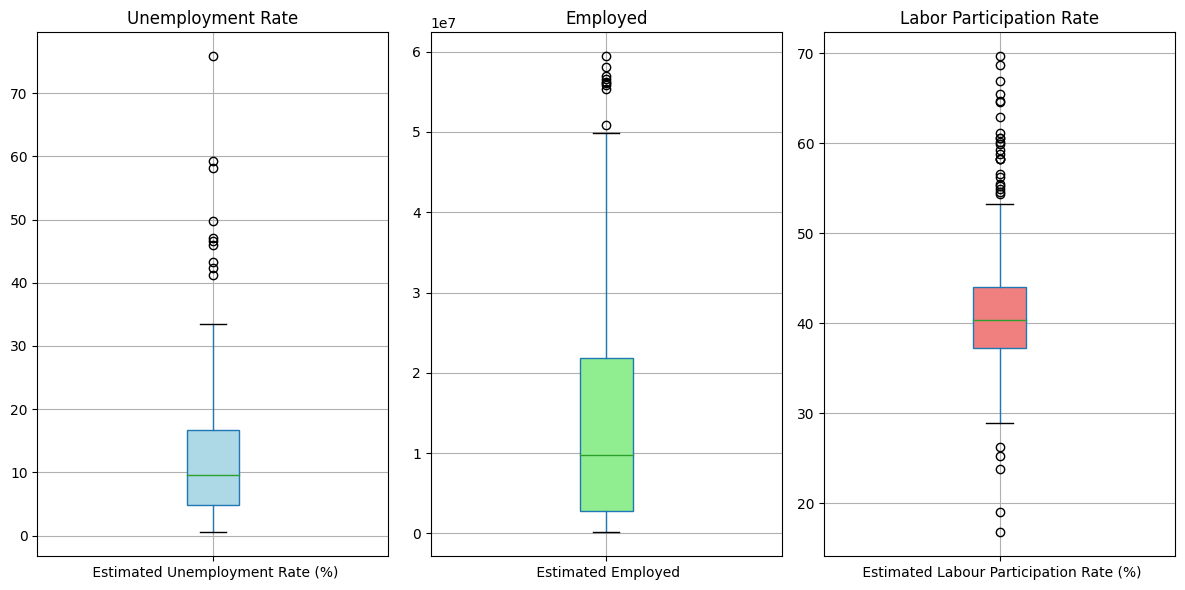

In [ ]:
#Outlier detection
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column=' Estimated Unemployment Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column=' Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column=' Estimated Labour Participation Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

**ANALYSING THE DATASET**

**Unemployment rate in India during Covid-19**

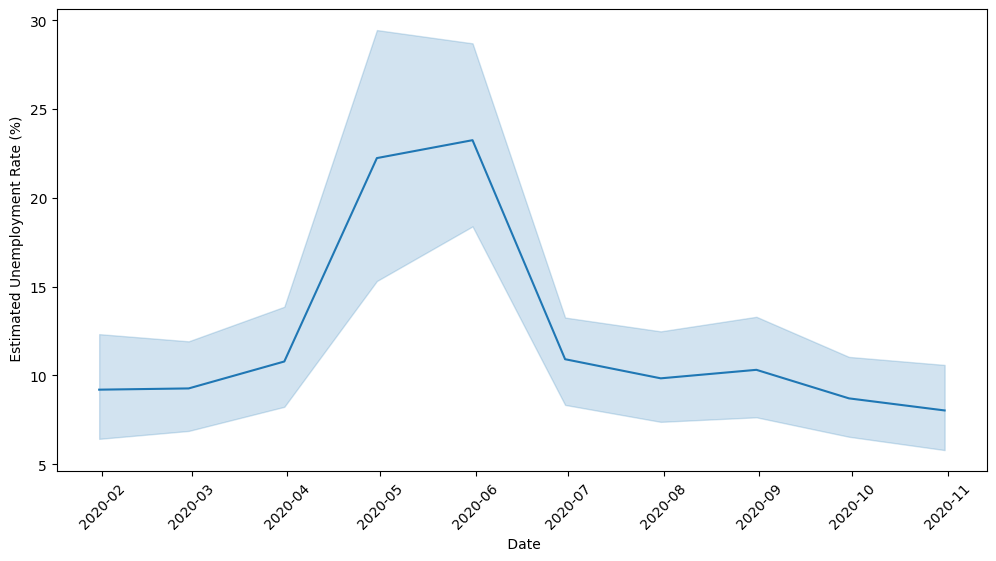

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

**Unemployment rate in each state**

In [ ]:
# Calculate average unemployment rate by state
average_unemployment_rate =df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()

State with HIGHEST unployment rate

In [ ]:
# Find the state with the highest unemployment rate
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()


In [ ]:
print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)

State with the highest unemployment rate: Haryana
Highest unemployment rate: 27.476999999999997


State with LOWEST unemployment rate

In [ ]:
# Find the state with the lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

In [ ]:
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)

State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 3.8659999999999997


Average unemployment rate in each state

In [ ]:
import plotly.express as px
plot_unemp = df[[' Estimated Unemployment Rate (%)','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values(' Estimated Unemployment Rate (%)')

fig = px.bar(df_unemployed, x='Region',y=' Estimated Unemployment Rate (%)',color = 'Region',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

The estimated unemployment rate is highest in Haryana.

Visualizes the distribution of unemployment rates within different areas.

In [ ]:
fig = px.violin(
    df,
    x='Region.1',
    y=' Estimated Unemployment Rate (%)',
    title='Distribution of Unemployment Rates by Areas',
    box=True,  # Include box plot inside the violin
    points='all',  # Show individual data points
)

fig.show()

Since areas with wider or taller violins may have more variability in unemployment rates, south and east part of India experienced higher unemployment.

Composition of Labour Participation Rates by Region Over Time.

In [ ]:
fig = px.violin(
    df,
    x=' Date',
    y=' Estimated Labour Participation Rate (%)',
    color='Region',
    labels={'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'},
    category_orders={'Region': df['Region'].unique()}  # Preserve the order of regions
)

fig.update_layout(
    xaxis_title=' Date',
    yaxis_title=' Labour Participation Rate (%)',
    legend_title='Region',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()

In [ ]:
fig = px.violin(
    df,
    x=' Date',
    y=' Estimated Labour Participation Rate (%)',
    color='Region.1',
    labels={'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'},
    category_orders={'Region.1': df['Region.1'].unique()}  # Preserve the order of regions
)

fig.update_layout(
    xaxis_title=' Date',
    yaxis_title=' Labour Participation Rate (%)',
    legend_title='Region.1',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()

During the month of april labour participation declined all over India.

**relationship between unemployment rate and labor participation rate**

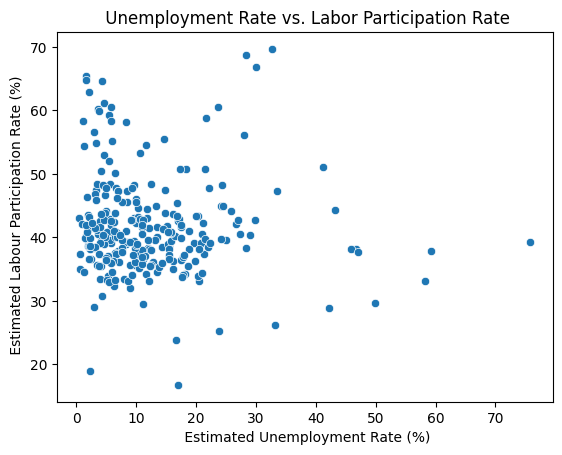

In [ ]:
sns.scatterplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Labour Participation Rate (%)', data=df)
plt.title(' Unemployment Rate vs. Labor Participation Rate')
plt.show()

In [ ]:
df['Month'] = df[' Date'].dt.month
df

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,1
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,2
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,3
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,4
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,5
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,6
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,7
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,8
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,9


In [ ]:
print(df.columns)

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'Month'],
      dtype='object')


**Sunburst chart**

In [ ]:
import plotly.express as px
sunburst_data =df.groupby(['Region.1','Region'])[' Estimated Employed'].sum().reset_index()
fig = px.sunburst(sunburst_data, path=['Region.1','Region'], values=' Estimated Employed')
fig.show()

**Percentage change in unemployment**


In [ ]:
# Filter data for months 1 to 3 (before lockdown)
before_lock = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['Region', ' Estimated Unemployment Rate (%)']]

In [ ]:
# Filter data for months 3 to 5 (after lockdown)
after_lock = df[(df['Month'] >= 3) & (df['Month'] < 6)][['Region', ' Estimated Unemployment Rate (%)']]

In [ ]:
before_lock = before_lock.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={' Estimated Unemployment Rate (%)':' Unemployment Rate before Lock-Down'})

In [ ]:
after_lock = after_lock.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={' Estimated Unemployment Rate (%)':' Unemployment Rate after Lock-Down'})

In [ ]:
before_lock[' Percentage Change in Unemployment'] = round((after_lock[' Unemployment Rate after Lock-Down'] - before_lock[' Unemployment Rate before Lock-Down']) / before_lock[' Unemployment Rate before Lock-Down'], 2)

<Axes: xlabel=' Percentage Change in Unemployment', ylabel='Region'>

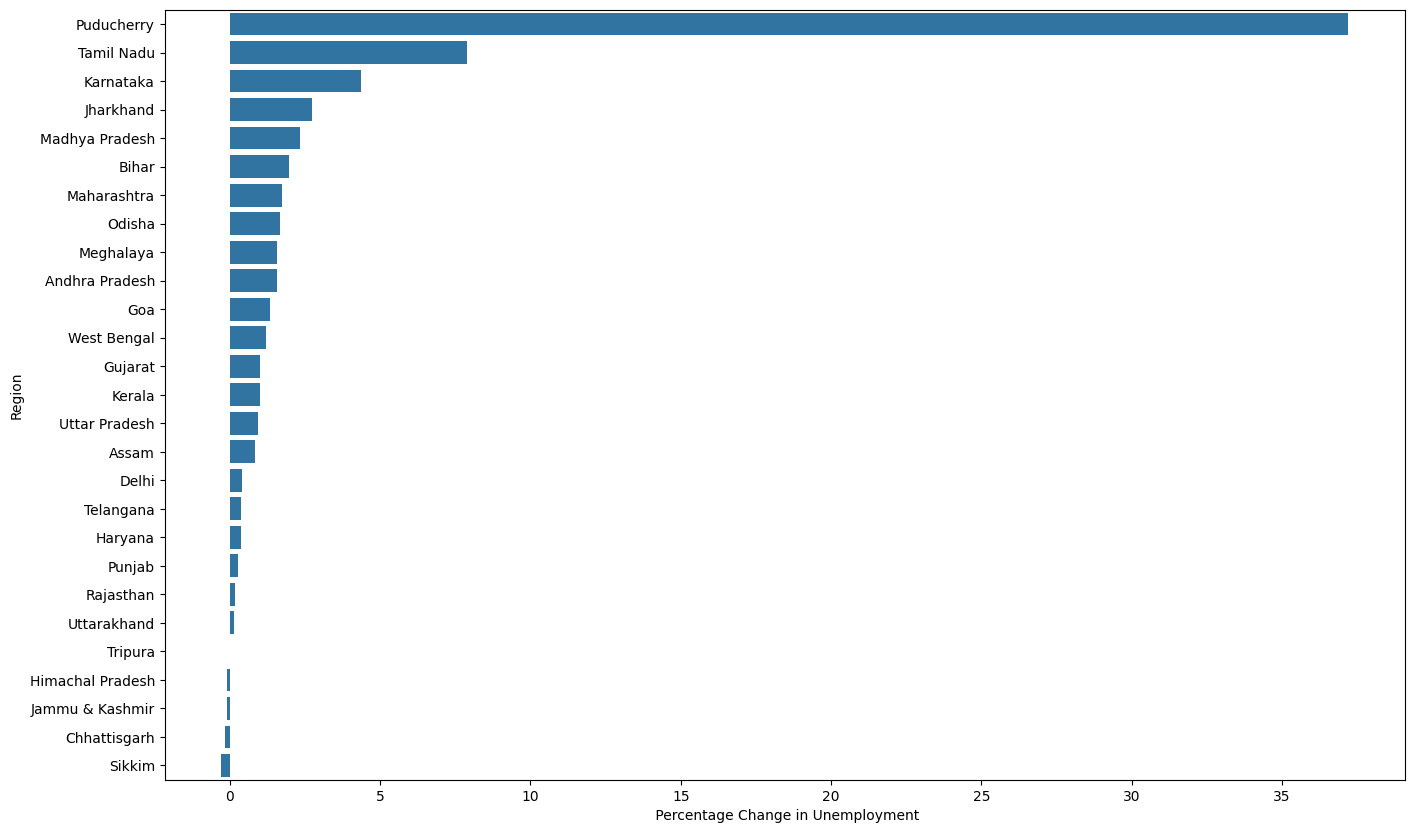

In [ ]:
plot_df = before_lock.sort_values(' Percentage Change in Unemployment', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='Region', x=' Percentage Change in Unemployment')

If the percentage change is positive (+X%), it means that unemployment has increased by X% compared to the previous period. In other words, more people are unemployed.

If the percentage change is negative (-X%), it means that unemployment has decreased by X% compared to the previous period. Fewer people are unemployed.

The magnitude of the percentage change indicates how significant the change is. A larger percentage change suggests a more substantial shift in unemployment rates compared to a smaller percentage change.

Puducherry's unemployment rate had been seriously impacted by the lock-down.

Sikkim, Chattisgarh, Jammu & Kashmir and Himachal Pradesh have negetive percentage change.That means these states are not highly impacted by the lock down.